In [1]:
import pandas as pd
import os
from dotenv import load_dotenv
import requests
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
load_dotenv()  # take environment variables from .env.

True

In [5]:
import pandas as pd
import requests
from datetime import datetime, timedelta

def get_last_year_hourly_stock_data(symbol, api_key):
    # Calculate start and end dates for the last year
    end_date = datetime.now().strftime('%Y-%m-%d')
    start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

    # Construct the API request URL for hourly data
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=60min&apikey={api_key}&outputsize=full&startdate={start_date}&enddate={end_date}'
    
    # Send the HTTP GET request
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse JSON response
        data = response.json()
        return data
    else:
        print(f"Failed to fetch data: {response.status_code}")
        return None

def extract_hourly_data(data):
    hourly_data = []
    # Extract hourly data from the 'Time Series (60min)' dictionary in the API response
    for date, values in data['Time Series (60min)'].items():
        hourly_data.append({
            'date': date,
            'open': float(values['1. open']),
            'high': float(values['2. high']),
            'low': float(values['3. low']),
            'close': float(values['4. close'])
        })
    return hourly_data

def get_last_year_daily_stock_data(symbol, api_key):
    # Calculate start and end dates for the last year
    end_date = datetime.now().strftime('%Y-%m-%d')
    start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

    # Construct the API request URL for daily data
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=QQQ&apikey={api_key}&outputsize=full&startdate={start_date}&enddate={end_date}'
    
    # Send the HTTP GET request
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse JSON response
        data = response.json()
        return data
    else:
        print(f"Failed to fetch data: {response.status_code}")
        return None

def extract_daily_data(data):
    daily_data = []
    # Extract daily data from the 'Time Series (Daily)' dictionary in the API response
    for date, values in data['Time Series (Daily)'].items():
        daily_data.append({
            'date': date,
            'open': float(values['1. open']),
            'high': float(values['2. high']),
            'low': float(values['3. low']),
            'close': float(values['4. close'])
        })
    return daily_data

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
API_KEY = 'YOUR_API_KEY'

# Replace 'AAPL' with the symbol of the stock you want to retrieve data for
symbol = 'QQQ'

# Fetch hourly stock data for the last year
hourly_data = get_last_year_hourly_stock_data(symbol, API_KEY)

# Check if hourly data is retrieved successfully
if hourly_data:
    # Extract hourly data from the API response
    hourly_data = extract_hourly_data(hourly_data)
    
    # Create a DataFrame from the extracted hourly data
    hourly_df = pd.DataFrame(hourly_data)
    
    # Print the hourly DataFrame
    print("Hourly Data:")
    print(hourly_df)

# Fetch daily stock data for the last year
daily_data = get_last_year_daily_stock_data(symbol, API_KEY)

# Check if daily data is retrieved successfully
if daily_data:
    # Extract daily data from the API response
    daily_data = extract_daily_data(daily_data)
    
    # Create a DataFrame from the extracted daily data
    daily_df = pd.DataFrame(daily_data)
    
    # Print the daily DataFrame
    #print("\nDaily Data:")
    #print(daily_df)


Hourly Data:
                    date     open     high      low   close
0    2024-02-23 19:00:00  436.085  436.140  435.600  435.75
1    2024-02-23 18:00:00  436.100  436.280  436.070  436.07
2    2024-02-23 17:00:00  436.120  436.200  429.413  436.11
3    2024-02-23 16:00:00  436.750  438.383  436.040  436.15
4    2024-02-23 15:00:00  437.460  437.585  436.230  436.75
..                   ...      ...      ...      ...     ...
235  2024-02-02 08:00:00  426.500  427.060  419.120  423.51
236  2024-02-02 07:00:00  426.460  427.060  426.120  426.62
237  2024-02-02 06:00:00  426.220  426.480  426.080  426.46
238  2024-02-02 05:00:00  426.320  426.660  426.010  426.25
239  2024-02-02 04:00:00  427.000  427.000  426.000  426.30

[240 rows x 5 columns]


In [6]:
daily_df.head()

,date,open,high,low,close
0,2024-02-23,439.65,440.59,435.79,436.78
1,2024-02-22,434.49,439.12,433.71,438.07
2,2024-02-21,424.55,425.70,421.63,425.61
3,2024-02-20,428.55,430.08,423.50,427.32
4,2024-02-16,434.89,434.99,429.85,430.57


In [9]:
hourly_df.head()

,date,open,high,low,close
0,2024-02-23 19:00:00,436.085,436.140,435.600,435.75
1,2024-02-23 18:00:00,436.100,436.280,436.070,436.07
2,2024-02-23 17:00:00,436.120,436.200,429.413,436.11
3,2024-02-23 16:00:00,436.750,438.383,436.040,436.15
4,2024-02-23 15:00:00,437.460,437.585,436.230,436.75


In [10]:
daily_df.describe()

,open,high,low,close
count,6117.000000,6117.000000,6117.000000,6117.000000
mean,117.506445,118.478924,116.432629,117.519023
std,103.844531,104.633802,103.007233,103.897691
min,19.940000,20.530000,19.760000,20.060000
25%,41.820000,42.140000,41.330000,41.700000
50%,68.340000,68.720000,67.860000,68.320000
75%,164.240000,165.770000,162.060000,163.630000
max,439.650000,440.590000,435.790000,438.070000


In [7]:
# Assuming 'df' is your DataFrame containing the stock data

# Calculate the number of days where close is higher than open
higher_close_count = df[df['close'] > df['open']].shape[0]

# Calculate the number of days where open is higher than close
higher_open_count = df[df['open'] > df['close']].shape[0]

print(f"Days with close higher than open: {higher_close_count}")
print(f"Days with open higher than close: {higher_open_count}")


Days with close higher than open: 126
Days with open higher than close: 112


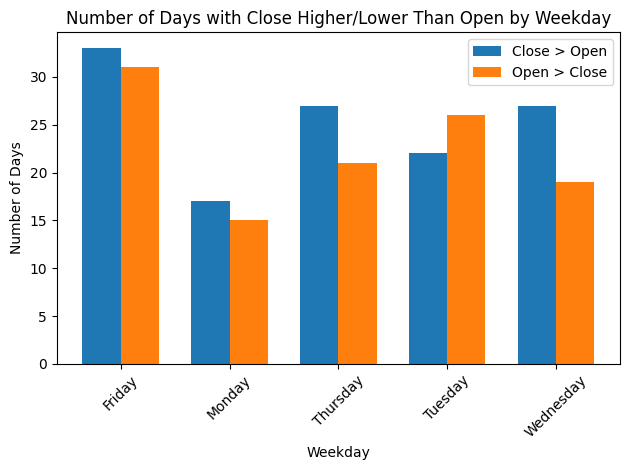

In [7]:

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create a new column for weekday
df['weekday'] = df['date'].dt.day_name()

# Count the occurrences where close is higher than open and group by weekday
higher_close_counts = df[df['close'] > df['open']].groupby('weekday').size()

# Count the occurrences where open is higher than close and group by weekday
higher_open_counts = df[df['open'] > df['close']].groupby('weekday').size()

# Plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
labels = higher_close_counts.index
x = range(len(labels))
ax.bar(x, higher_close_counts, bar_width, label='Close > Open')
ax.bar([i + bar_width for i in x], higher_open_counts, bar_width, label='Open > Close')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()
plt.xlabel('Weekday')
plt.ylabel('Number of Days')
plt.title('Number of Days with Close Higher/Lower Than Open by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
daily_df

,open,high,low,close
date,,,,
2024-02-23 19:00:00,439.65,440.59,435.79,436.78
2024-02-23 18:00:00,434.49,439.12,433.71,438.07
2024-02-23 17:00:00,424.55,425.70,421.63,425.61
2024-02-23 16:00:00,428.55,430.08,423.50,427.32
2024-02-23 15:00:00,434.89,434.99,429.85,430.57
...,...,...,...,...
NaT,137.80,138.40,136.40,136.40
NaT,135.40,135.60,133.60,135.00
NaT,132.80,134.30,132.40,133.50


In [10]:
# Sample DataFrame (assuming df contains your hourly data)
# Make sure 'date' column is in datetime format
daily_df['date'] = pd.to_datetime(daily_df['date'])
daily_df.set_index('date', inplace=True)

# Assuming df contains hourly data with 'date' column in datetime format
# Filter data for 10:00 AM and 02:00 PM
price_10am = daily_df[daily_df['date'].dt.hour == 10]
price_2pm = daily_df[daily_df['date'].dt.hour == 14]

# Initialize counter for the number of days
count = 0

# Iterate through the DataFrame to compare prices
for date in price_10am['date'].dt.date.unique():
    # Check if the price is greater at 10:00 AM and less at 02:00 PM
    price_10am_day = price_10am[price_10am['date'].dt.date == date]['close'].iloc[0]
    price_2pm_day = price_2pm[price_2pm['date'].dt.date == date]['close'].iloc[0]
    if price_10am_day > price_2pm_day:
        count += 1

print(f"The price is greater at 10:00 AM and less at 02:00 PM on {count} days.")


KeyError: 'date'